### Synopsis
* This code establishes conversion between ion chamber (IC) readouts and PIN diode readouts.
* This conversion is established via linear-fitting between the ion chamber and PIN diode readout at different x-ray attenuation ratios.
* The goal is to convert the upstream/downstream ion chamber readouts to photon counts for absolute cross-section calculation.


In [1]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
from scipy.optimize import curve_fit


### Input the upstream/downstream IC readout and photon counts
* The dark values and the values at each attenuation ratio were manually read and logged into beamline notebook.
* The photon counts were converted from the downstream PIN diode (pind4) readout using existing 8-ID-I calibration formula.
* There is no sample in the beam. The attenuation between the upstream and downstream ion chamber arises from the air gap.

In [2]:

UpIC_dark = 83.6
DnIC_dark = 204.4
pind4_dark = 13141.9
ph_counts_dark = 3.04e8

UpIC = np.array([257609, 125204, 55586.5, 27036.8, 12296.8, 6028.8, 2714.4, 1361.1])
# pind4 = np.array([645687, 351204, 162281, 85326.9, 45776.8, 29016.8, 20163.9, 16553.5])-pind4_dark
DnIC = np.array([223888, 108873, 48413.4, 23613.7, 10807.5, 5367.4, 2485.5, 1310.9])
ph_counts = np.array([1.49e10, 8.12e9, 3.75e9, 1.97e9, 1.06e9, 6.71e8, 4.66e8, 3.83e8])-ph_counts_dark


### Linear fit between readout of upstream ion chamber and photon counts

In [3]:

def func(x, a, b):
    return a*x + b

crop = 1
popt, pcov = curve_fit(func, UpIC[crop:], ph_counts[crop:])


Left figure: Photon counts=6.25e+04*Up_IC-1.28e+07 from fitting
Right figure: Air absorption is 0.868 as read from the figure


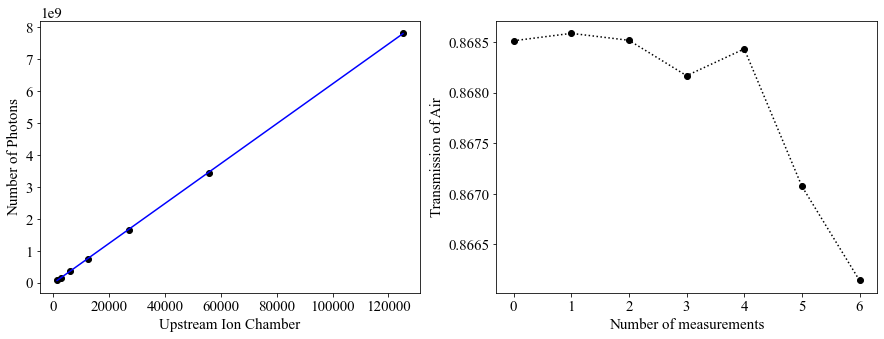

In [7]:

fs = 15
plt.rcParams['font.size'] = fs
plt.rcParams["font.family"] = "Times New Roman"

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(UpIC[crop:], ph_counts[crop:], 'ko')
axs[0].plot(UpIC[crop:], func(UpIC[crop:], *popt), 'b-')
axs[0].set_xlabel('Upstream Ion Chamber', fontsize=fs)
axs[0].set_ylabel('Number of Photons', fontsize=fs)
axs[0].tick_params(axis='both', labelsize=fs)

axs[1].plot(np.arange(7), (DnIC[crop:]-DnIC_dark)/(UpIC[crop:]-UpIC_dark), 'ko:')
axs[1].set_xlabel('Number of measurements', fontsize=fs)
axs[1].set_ylabel('Transmission of Air', fontsize=fs)
axs[1].tick_params(axis='both', labelsize=fs)

plt.savefig('UpIC_pind4.pdf', dpi=100, format='pdf', facecolor='w', edgecolor='w', transparent=True)

print(f'Left figure: Photon counts={popt[0]:.2e}*Up_IC{popt[1]:.2e} from fitting')
print(f'Right figure: Air absorption is 0.868 as read from the figure')